In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [9]:
df = pd.read_csv("data/final_table.csv")

In [10]:
df = df.fillna(0)

In [11]:
df

,date,open,max_v,min_v,close,volume,crypto,tweet,key_tweets
0,2021-01-03,"26.476,66","28.519,63","26.413,13","26.760,72",64.216.240.796,bitcoin,@RGVaerialphotos @SpaceX Yes,0
1,2021-01-03,"638,25","821,88","635,82","796,33",36.898.177.858,ethereum,@RGVaerialphotos @SpaceX Yes,0
2,2021-01-03,"292,25","353,57","292,25","344,32",5.937.217.755,bitcoincash,@RGVaerialphotos @SpaceX Yes,0
3,2021-01-03,"56,83","60,42","55,20","59,24",86.448.546,kusama,@RGVaerialphotos @SpaceX Yes,0
4,2021-01-03,"31,52","33,98","31,16","33,59",618.779.865,binance_coin,@RGVaerialphotos @SpaceX Yes,0
...,...,...,...,...,...,...,...,...,...
4237,2021-04-12,"577,22","588,12","563,67","573,99",2.469.639.936,bitcoincash,0,0
4238,2021-04-12,"362,87","368,96","350,19","359,62",189.517.376,kusama,0,0
4239,2021-04-12,"473,94","533,57","433,95","485,96",11.100.793.856,binance_coin,0,0
4240,2021-04-12,"215,08","217,27","206,22","212,84",4.683.266.560,lite_coin,0,0


In [12]:
df = df.astype(str)

In [13]:
df.key_tweets.unique()

array(['0', 'coin', 'crypto'], dtype=object)

In [14]:
df.crypto.value_counts()

bitcoin         606
bitcoincash     606
binance_coin    606
kusama          606
ethereum        606
lite_coin       606
bitcoin_gold    606
Name: crypto, dtype: int64

In [15]:
df.date = pd.to_datetime(df["date"])

In [16]:
df.dtypes

date          datetime64[ns]
open                  object
max_v                 object
min_v                 object
close                 object
volume                object
crypto                object
tweet                 object
key_tweets            object
dtype: object

In [17]:
def string_to_int(string):
    try:
        string = string.replace('.', '')
        return int(string)
    except:
        return string

In [18]:
df['open'] = df['open'].apply(string_to_int)
df['max_v'] = df['max_v'].apply(string_to_int)
df['min_v'] = df['min_v'].apply(string_to_int)
df['close'] = df['close'].apply(string_to_int)
df['volume'] = df['volume'].apply(string_to_int)

In [19]:
def string_to_int2(string):
    try:
        string = string.replace(',', '.')
        return float(string)
    except:
        return string

In [20]:
df['open'] = df['open'].apply(string_to_int2)
df['max_v'] = df['max_v'].apply(string_to_int2)
df['min_v'] = df['min_v'].apply(string_to_int2)
df['close'] = df['close'].apply(string_to_int2)
df['volume'] = df['volume'].apply(string_to_int2)

In [21]:
df.crypto.unique()

array(['bitcoin', 'ethereum', 'bitcoincash', 'kusama', 'binance_coin',
       'lite_coin', 'bitcoin_gold'], dtype=object)

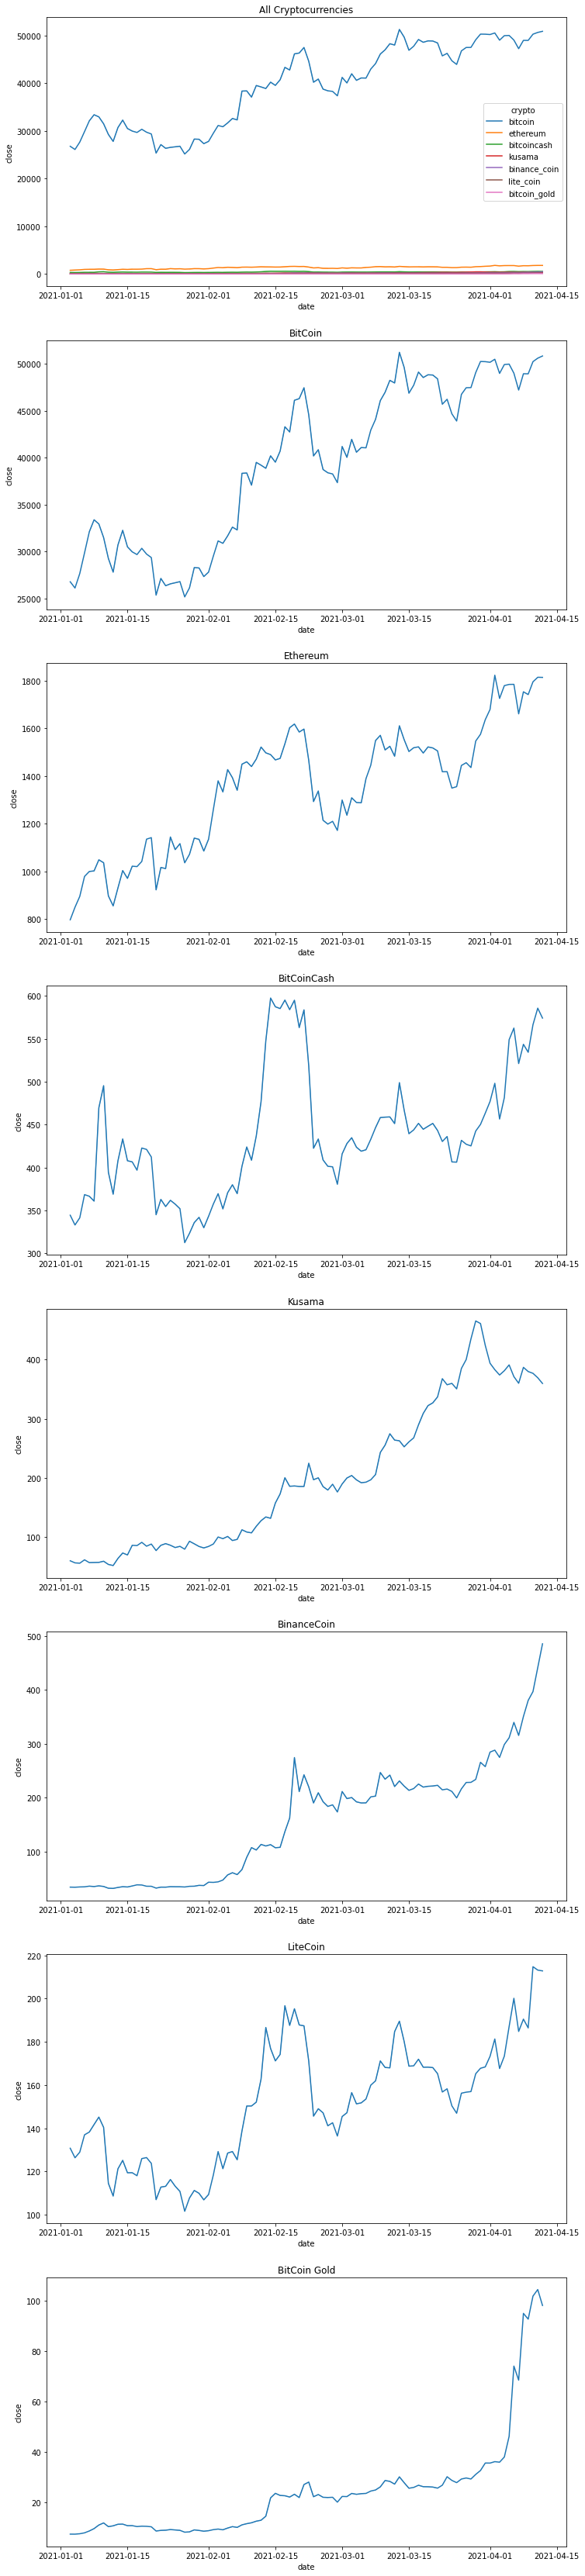

In [34]:
fil_bitcoin = df.loc[(df["crypto"] == 'bitcoin'), ["crypto",'date', 'close']]
fil_ethereum = df.loc[(df["crypto"] == 'ethereum'), ["crypto",'date', 'close']]
fil_bitcoincash = df.loc[(df["crypto"] == 'bitcoincash'), ["crypto",'date', 'close']]
fil_kusama = df.loc[(df["crypto"] == 'kusama'), ["crypto",'date', 'close']]
fil_binance_coin = df.loc[(df["crypto"] == 'binance_coin'), ["crypto",'date', 'close']]
fil_lite_coin = df.loc[(df["crypto"] == 'lite_coin'), ["crypto",'date', 'close']]
fil_bitcoin_gold = df.loc[(df["crypto"] == 'bitcoin_gold'), ["crypto",'date', 'close']]

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(12, 60))



# .plot method plots series of points
plot = sns.lineplot(data=df, x=df['date'], y=df['close'], hue=df.crypto, ax=axs[0])
plot1 = sns.lineplot(x='date', y='close', data=fil_bitcoin, ax=axs[1])
plot2 = sns.lineplot(x='date', y='close', data=fil_ethereum, ax=axs[2])
plot3 = sns.lineplot(x='date', y='close', data=fil_bitcoincash, ax=axs[3])
plot4 = sns.lineplot(x='date', y='close', data=fil_kusama, ax=axs[4])
plot5 = sns.lineplot(x='date', y='close', data=fil_binance_coin, ax=axs[5])
plot6 = sns.lineplot(x='date', y='close', data=fil_lite_coin, ax=axs[6])
plot7 = sns.lineplot(x='date', y='close', data=fil_bitcoin_gold, ax=axs[7])
        
        
plot.title.set_text('All Cryptocurrencies')
plot1.title.set_text('BitCoin')
plot2.title.set_text('Ethereum')
plot3.title.set_text('BitCoinCash')
plot4.title.set_text('Kusama')
plot5.title.set_text('BinanceCoin')
plot6.title.set_text('LiteCoin')
plot7.title.set_text('BitCoin Gold')

fig.savefig("images/Crypto_all.svg")

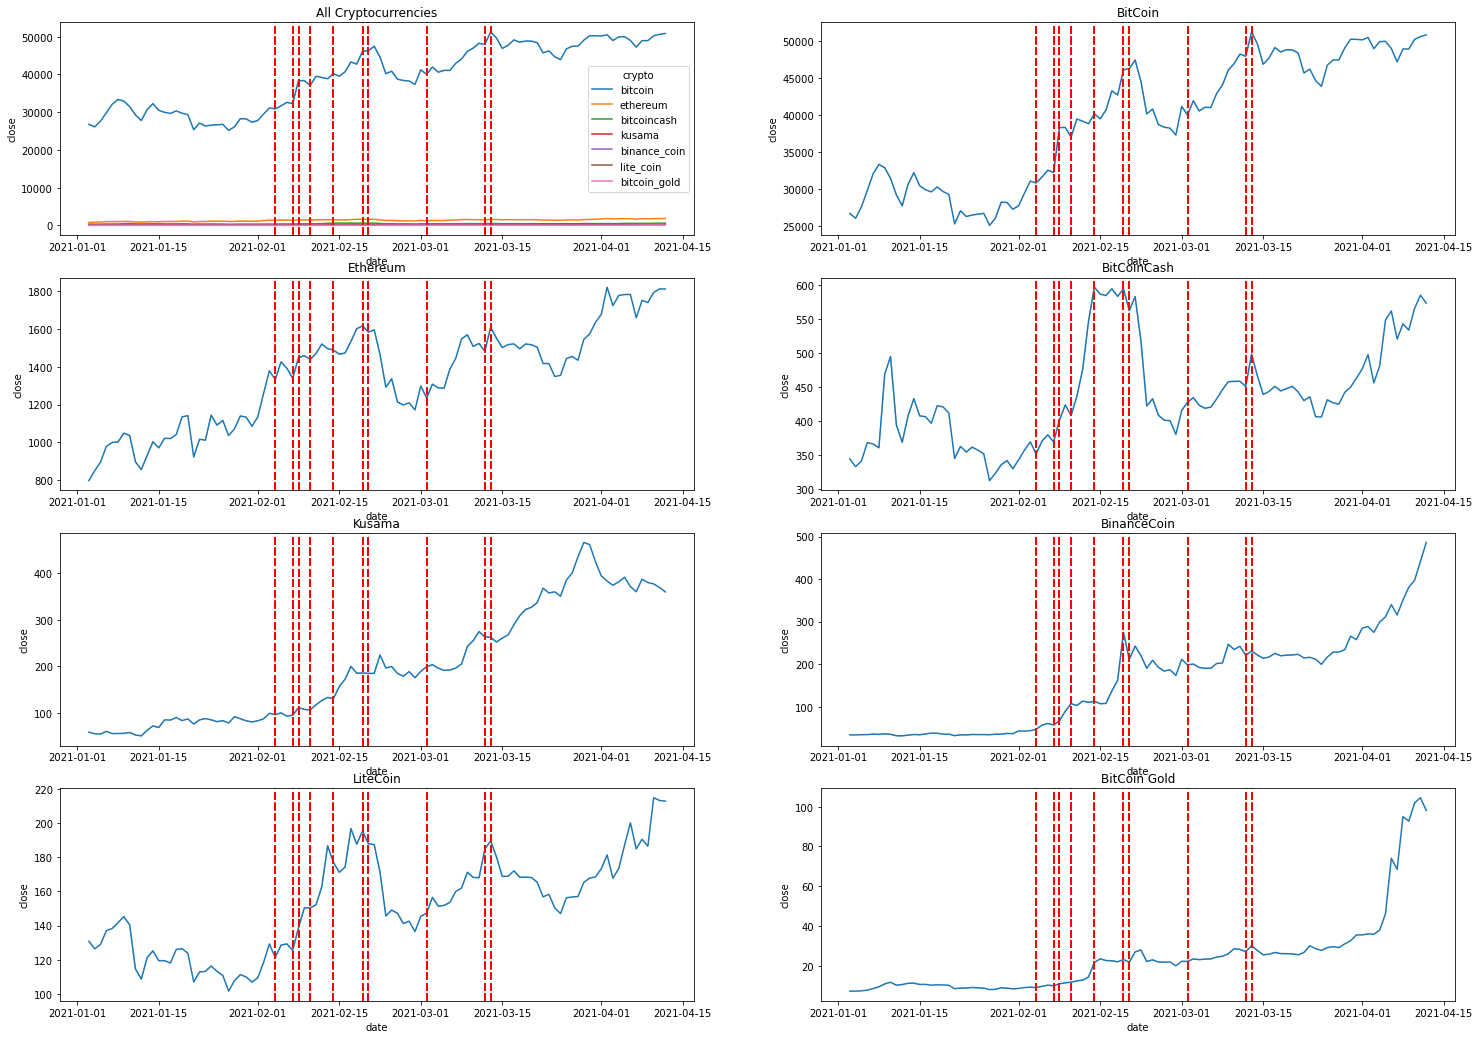

In [23]:
fil_bitcoin = df.loc[(df["crypto"] == 'bitcoin'), ["crypto",'date', 'close']]
fil_ethereum = df.loc[(df["crypto"] == 'ethereum'), ["crypto",'date', 'close']]
fil_bitcoincash = df.loc[(df["crypto"] == 'bitcoincash'), ["crypto",'date', 'close']]
fil_kusama = df.loc[(df["crypto"] == 'kusama'), ["crypto",'date', 'close']]
fil_binance_coin = df.loc[(df["crypto"] == 'binance_coin'), ["crypto",'date', 'close']]
fil_lite_coin = df.loc[(df["crypto"] == 'lite_coin'), ["crypto",'date', 'close']]
fil_bitcoin_gold = df.loc[(df["crypto"] == 'bitcoin_gold'), ["crypto",'date', 'close']]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(25, 18))



# .plot method plots series of points
plot = sns.lineplot(data=df, x=df['date'], y=df['close'], hue=df.crypto, ax=axs[0,0])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot1 = sns.lineplot(x='date', y='close', data=fil_bitcoin, ax=axs[0, 1])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot1.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot2 = sns.lineplot(x='date', y='close', data=fil_ethereum, ax=axs[1, 0])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot2.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot3 = sns.lineplot(x='date', y='close', data=fil_bitcoincash, ax=axs[1, 1])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot3.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot4 = sns.lineplot(x='date', y='close', data=fil_kusama, ax=axs[2, 0])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot4.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot5 = sns.lineplot(x='date', y='close', data=fil_binance_coin, ax=axs[2, 1])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot5.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot6 = sns.lineplot(x='date', y='close', data=fil_lite_coin, ax=axs[3, 0])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot6.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot7 = sns.lineplot(x='date', y='close', data=fil_bitcoin_gold, ax=axs[3, 1])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot7.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
        
        
plot.title.set_text('All Cryptocurrencies')
plot1.title.set_text('BitCoin')
plot2.title.set_text('Ethereum')
plot3.title.set_text('BitCoinCash')
plot4.title.set_text('Kusama')
plot5.title.set_text('BinanceCoin')
plot6.title.set_text('LiteCoin')
plot7.title.set_text('BitCoin Gold')

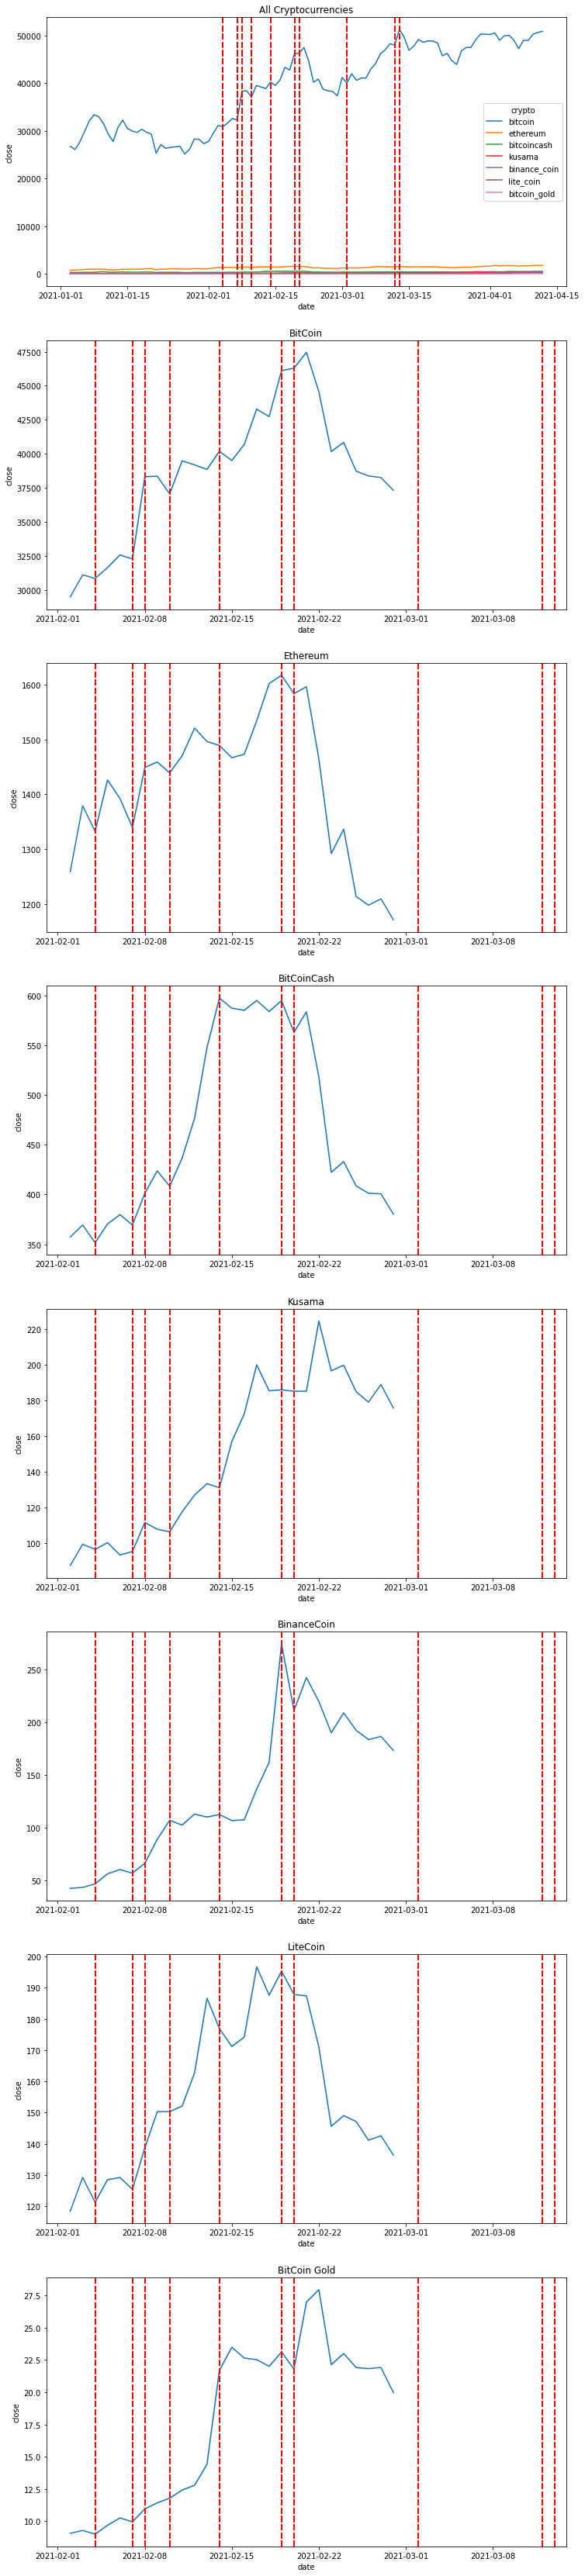

In [35]:
fil_bitcoin2 = df.loc[(df["crypto"] == 'bitcoin') & (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]
fil_ethereum2 = df.loc[(df["crypto"] == 'ethereum')& (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]
fil_bitcoincash2 = df.loc[(df["crypto"] == 'bitcoincash')& (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]
fil_kusama2 = df.loc[(df["crypto"] == 'kusama')& (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]
fil_binance_coin2 = df.loc[(df["crypto"] == 'binance_coin')& (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]
fil_lite_coin2 = df.loc[(df["crypto"] == 'lite_coin')& (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]
fil_bitcoin_gold2 = df.loc[(df["crypto"] == 'bitcoin_gold')& (df['date'] > '2021-02') & (df['date'] < '2021-03') , ["crypto",'date', 'close']]

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(12, 60))

plt.title('Cryptocurrencies')

# .plot method plots series of points
plot = sns.lineplot(data=df, x=df['date'], y=df['close'], hue=df.crypto, ax=axs[0])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot1 = sns.lineplot(x='date', y='close', data=fil_bitcoin2, ax=axs[1])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot1.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot2 = sns.lineplot(x='date', y='close', data=fil_ethereum2, ax=axs[2])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot2.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot3 = sns.lineplot(x='date', y='close', data=fil_bitcoincash2, ax=axs[3])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot3.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot4 = sns.lineplot(x='date', y='close', data=fil_kusama2, ax=axs[4])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot4.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot5 = sns.lineplot(x='date', y='close', data=fil_binance_coin2, ax=axs[5])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot5.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot6 = sns.lineplot(x='date', y='close', data=fil_lite_coin2, ax=axs[6])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot6.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot7 = sns.lineplot(x='date', y='close', data=fil_bitcoin_gold2, ax=axs[7])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot7.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
        
plot.title.set_text('All Cryptocurrencies')
plot1.title.set_text('BitCoin')
plot2.title.set_text('Ethereum')
plot3.title.set_text('BitCoinCash')
plot4.title.set_text('Kusama')
plot5.title.set_text('BinanceCoin')
plot6.title.set_text('LiteCoin')
plot7.title.set_text('BitCoin Gold')

fig.savefig("images/Crypto_all_02-03.svg")

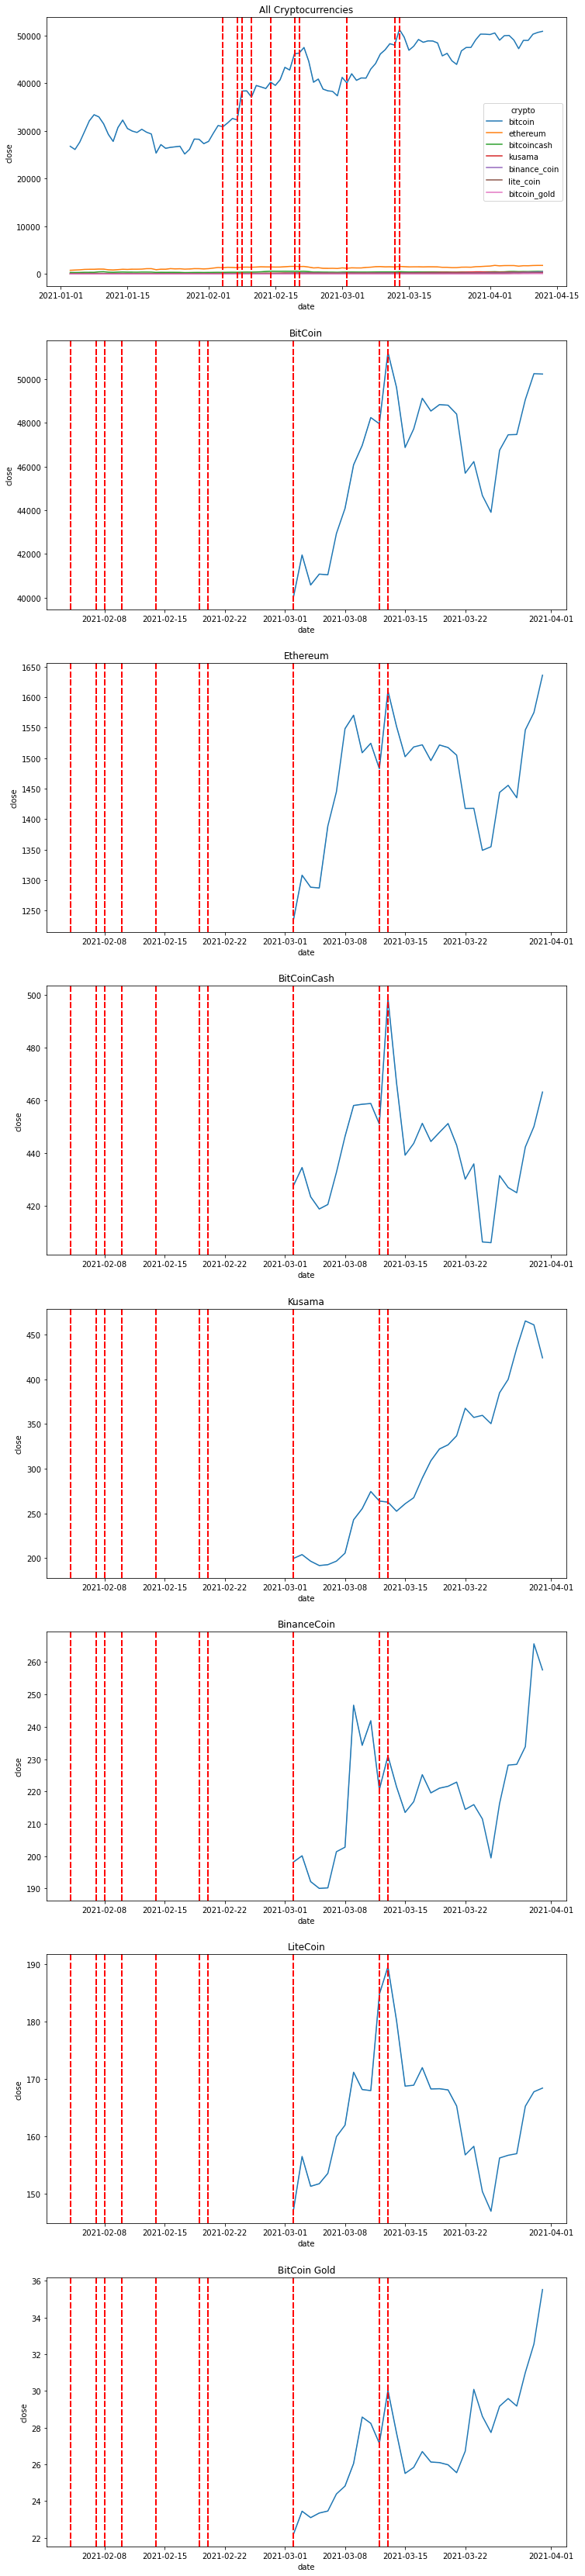

In [33]:
fil_bitcoin3 = df.loc[(df["crypto"] == 'bitcoin') & (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]
fil_ethereum3 = df.loc[(df["crypto"] == 'ethereum')& (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]
fil_bitcoincash3 = df.loc[(df["crypto"] == 'bitcoincash')& (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]
fil_kusama3 = df.loc[(df["crypto"] == 'kusama')& (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]
fil_binance_coin3 = df.loc[(df["crypto"] == 'binance_coin')& (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]
fil_lite_coin3 = df.loc[(df["crypto"] == 'lite_coin')& (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]
fil_bitcoin_gold3 = df.loc[(df["crypto"] == 'bitcoin_gold')& (df['date'] > '2021-03') & (df['date'] < '2021-04') , ["crypto",'date', 'close']]

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(12, 60))

# .plot method plots series of points
plot = sns.lineplot(data=df, x=df['date'], y=df['close'], hue=df.crypto, ax=axs[0])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot1 = sns.lineplot(x='date', y='close', data=fil_bitcoin3, ax=axs[1])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot1.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot2 = sns.lineplot(x='date', y='close', data=fil_ethereum3, ax=axs[2])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot2.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot3 = sns.lineplot(x='date', y='close', data=fil_bitcoincash3, ax=axs[3])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot3.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot4 = sns.lineplot(x='date', y='close', data=fil_kusama3, ax=axs[4])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot4.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot5 = sns.lineplot(x='date', y='close', data=fil_binance_coin3, ax=axs[5])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot5.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot6 = sns.lineplot(x='date', y='close', data=fil_lite_coin3, ax=axs[6])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot6.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
plot7 = sns.lineplot(x='date', y='close', data=fil_bitcoin_gold3, ax=axs[7])
for i, row in df.iterrows():
    if row.key_tweets != '0':
        fecha = row["date"]
        plot7.axvline(fecha, color="red", linestyle="--", lw=2, label="lancement")
        
plot.title.set_text('All Cryptocurrencies')
plot1.title.set_text('BitCoin')
plot2.title.set_text('Ethereum')
plot3.title.set_text('BitCoinCash')
plot4.title.set_text('Kusama')
plot5.title.set_text('BinanceCoin')
plot6.title.set_text('LiteCoin')
plot7.title.set_text('BitCoin Gold')

fig.savefig("images/Crypto_all_03-04.svg")

### TESTING

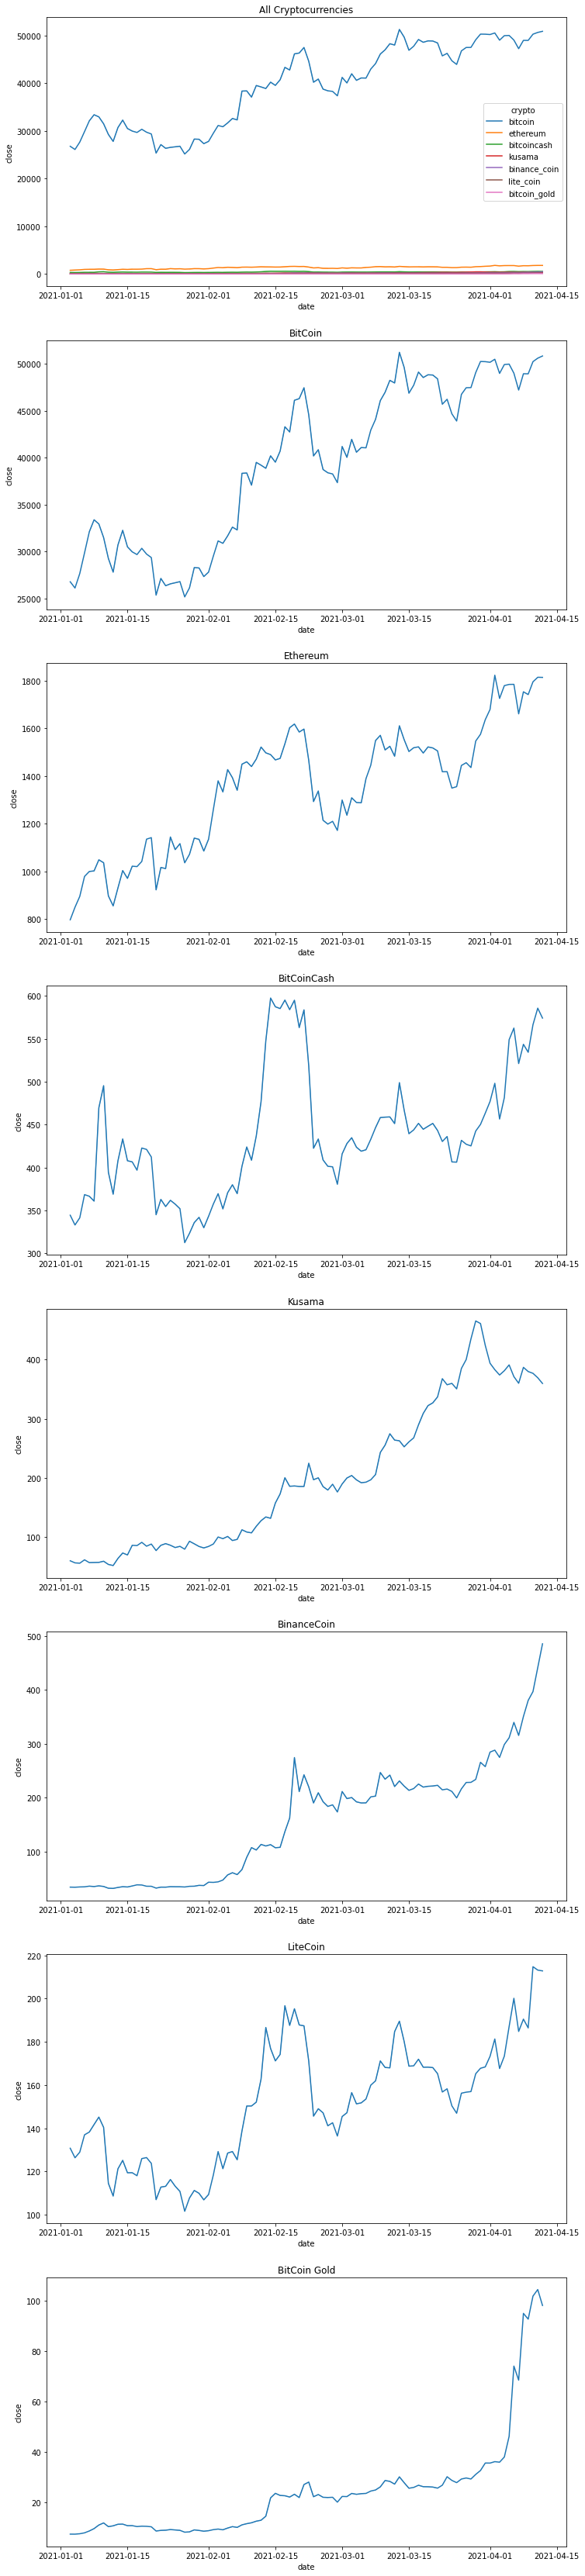

In [32]:
fil_bitcoin = df.loc[(df["crypto"] == 'bitcoin'), ["crypto",'date', 'close']]
fil_ethereum = df.loc[(df["crypto"] == 'ethereum'), ["crypto",'date', 'close']]
fil_bitcoincash = df.loc[(df["crypto"] == 'bitcoincash'), ["crypto",'date', 'close']]
fil_kusama = df.loc[(df["crypto"] == 'kusama'), ["crypto",'date', 'close']]
fil_binance_coin = df.loc[(df["crypto"] == 'binance_coin'), ["crypto",'date', 'close']]
fil_lite_coin = df.loc[(df["crypto"] == 'lite_coin'), ["crypto",'date', 'close']]
fil_bitcoin_gold = df.loc[(df["crypto"] == 'bitcoin_gold'), ["crypto",'date', 'close']]

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(12, 60))



# .plot method plots series of points
plot = sns.lineplot(data=df, x=df['date'], y=df['close'], hue=df.crypto, ax=axs[0])
plot1 = sns.lineplot(x='date', y='close', data=fil_bitcoin, ax=axs[1])
plot2 = sns.lineplot(x='date', y='close', data=fil_ethereum, ax=axs[2])
plot3 = sns.lineplot(x='date', y='close', data=fil_bitcoincash, ax=axs[3])
plot4 = sns.lineplot(x='date', y='close', data=fil_kusama, ax=axs[4])
plot5 = sns.lineplot(x='date', y='close', data=fil_binance_coin, ax=axs[5])
plot6 = sns.lineplot(x='date', y='close', data=fil_lite_coin, ax=axs[6])
plot7 = sns.lineplot(x='date', y='close', data=fil_bitcoin_gold, ax=axs[7])
        
        
plot.title.set_text('All Cryptocurrencies')
plot1.title.set_text('BitCoin')
plot2.title.set_text('Ethereum')
plot3.title.set_text('BitCoinCash')
plot4.title.set_text('Kusama')
plot5.title.set_text('BinanceCoin')
plot6.title.set_text('LiteCoin')
plot7.title.set_text('BitCoin Gold')

fig.savefig("images/Crypto_all.svg")